**Sentiment Analysis of Movie Reviews**

Loading required libraries

In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk

Loading Training and Testing Data

In [2]:
df = pd.read_csv("train.tsv", sep="\t")

In [3]:
df_test = pd.read_csv("test.tsv", sep="\t")

In [4]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


0-negative , 1-somewhat negative, 2-neutral , 3-somewhat positive, 4- positive

In [5]:
df_test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


Creating TF-IDF Vectorizer

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import TweetTokenizer

tokenizer = TweetTokenizer()

vectorizer = TfidfVectorizer(ngram_range=(1, 3), tokenizer=tokenizer.tokenize)
full_text = list(df['Phrase'].values) + list(df_test['Phrase'].values)

vectorizer.fit(full_text)
train_vectorized = vectorizer.transform(df['Phrase'])
test_vectorized = vectorizer.transform(df_test['Phrase'])

In [7]:
print("Train set dimensions after applying TF-IDF vectorizer:")
np.shape(train_vectorized)

Train set dimensions after applying TF-IDF vectorizer:


(156060, 301627)

In [8]:
X = train_vectorized
y = df.Sentiment.values


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import time

# split the data into 80:20 for training and validating.
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2, shuffle=True)

In [9]:
performance_metrics_df = pd.DataFrame(columns=['accuracy','F1-score','training-time'], index=['LogisticRegression', 'DecisionTreeClassifier', 'ExtraTreesClassifier', 'RandomForestClassifier', 'LinearSVC', 'BernoulliNB', 'MultinomialNB', 'KNeighborsClassifier'])

Using Machine Learning Techniques

5. Linear SVC


Evaluation of LinearSVC, multi_class='ovr', with train-test split:
              precision    recall  f1-score   support

           0       0.48      0.36      0.41      1414
           1       0.55      0.50      0.52      5455
           2       0.73      0.82      0.77     15917
           3       0.58      0.52      0.55      6585
           4       0.54      0.41      0.47      1841

   micro avg       0.65      0.65      0.65     31212
   macro avg       0.58      0.52      0.54     31212
weighted avg       0.64      0.65      0.65     31212


accuracy_score 0.6542675893886967

Weighted Averaged validation metrics
precision_score 0.6430068928938866
recall_score 0.6542675893886967
f1_score 0.6457990516414972


elapsed time in seconds:  10.8786461353302



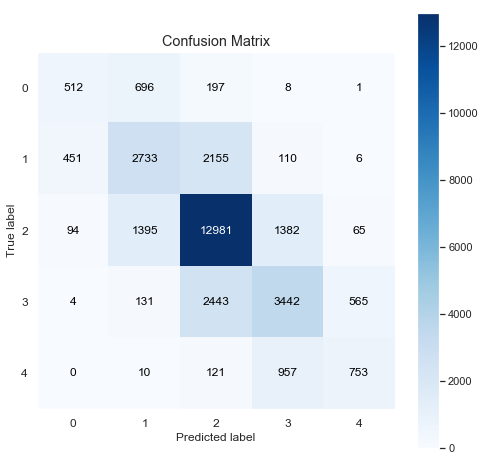

In [10]:
from sklearn.svm import LinearSVC

start_time = time.time()
    
print()
print("Evaluation of LinearSVC, multi_class='ovr', with train-test split:")

clf_LinearSVC = LinearSVC(multi_class='ovr', random_state=42)
clf_LinearSVC.fit(xtrain, ytrain)
predictions = clf_LinearSVC.predict(xvalid)
print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions, average='weighted'))
print("recall_score", recall_score(yvalid, predictions, average='weighted'))
print("f1_score", f1_score(yvalid, predictions, average='weighted'))


performance_metrics_df.loc['LinearSVC']['training-time'] = time.time() - start_time
performance_metrics_df.loc['LinearSVC']['accuracy'] = accuracy_score(yvalid, predictions)
performance_metrics_df.loc['LinearSVC']['F1-score'] = f1_score(yvalid, predictions, average='weighted')

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions)


print()
print("elapsed time in seconds: ", time.time() - start_time)
print()

In [13]:
sample_data = df_test['Phrase']
sample = vectorizer.transform(sample_data)
svc_res=clf_LinearSVC.predict(sample)

In [16]:
prediction=pd.DataFrame({'PhraseId':df_test['PhraseId'],'SentenceId':df_test['SentenceId'],'Phrase':df_test['Phrase'],'Phrase_Prediction':svc_res})
prediction

,PhraseId,SentenceId,Phrase,Phrase_Prediction
0,156061,8545,An intermittently pleasing but mostly routine ...,2
1,156062,8545,An intermittently pleasing but mostly routine ...,2
2,156063,8545,An,3
3,156064,8545,intermittently pleasing but mostly routine effort,2
4,156065,8545,intermittently pleasing but mostly routine,2
5,156066,8545,intermittently pleasing but,2
6,156067,8545,intermittently pleasing,3
7,156068,8545,intermittently,2
8,156069,8545,pleasing,3
9,156070,8545,but,2


In [17]:
sample_dat = df['Phrase']
sampl = vectorizer.transform(sample_dat)
svc_re=clf_LinearSVC.predict(sampl)

In [19]:
predict=pd.DataFrame({'PhraseId':df['PhraseId'],'SentenceId':df['SentenceId'],'Phrase':df['Phrase'],'sentiment':df['Sentiment'],'sentiment_Predict':svc_re})
predict

,PhraseId,SentenceId,Phrase,sentiment,sentiment_Predict
0,1,1,A series of escapades demonstrating the adage ...,1,2
1,2,1,A series of escapades demonstrating the adage ...,2,2
2,3,1,A series,2,2
3,4,1,A,2,4
4,5,1,series,2,2
5,6,1,of escapades demonstrating the adage that what...,2,2
6,7,1,of,2,2
7,8,1,escapades demonstrating the adage that what is...,2,2
8,9,1,escapades,2,2
9,10,1,demonstrating the adage that what is good for ...,2,2


In [20]:
accuracy_score(predict['sentiment'],predict['sentiment_Predict'])

0.8507112648981161